# 1) Importing the packages

In [255]:
# Import Packages
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics import tsaplots
import statsmodels.api as sm
from pylab import rcParams
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
plt.style.use('seaborn-bright')

# 2) Reading the dataset

In [257]:
# Reading the dataset and displaying its first 5 rows, and parsing the date column as the index
df = pd.read_csv('co2.csv', index_col='date', parse_dates=True)
df.head()

,CO2_ppm
date,
1958-03-01,315.71
1958-04-01,317.45
1958-05-01,317.50
1958-06-01,317.10
1958-07-01,315.86


In [258]:
# Printing the dataset general info
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 727 entries, 1958-03-01 to 2018-09-01
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CO2_ppm  727 non-null    float64
dtypes: float64(1)
memory usage: 11.4 KB


In [259]:
# Printing the numerical measures of the dataset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CO2_ppm,727.0,353.640702,27.443136,312.66,328.555,351.31,375.7,411.24


In [260]:
# Checking if there any Nulls in the data
df.isna().sum()

CO2_ppm    0
dtype: int64

> The data contains monthly records of CO2 levels from March-1958 to September-2018. </br>
> The data doesn't contain any null values.


# 3) Exploring the data visually

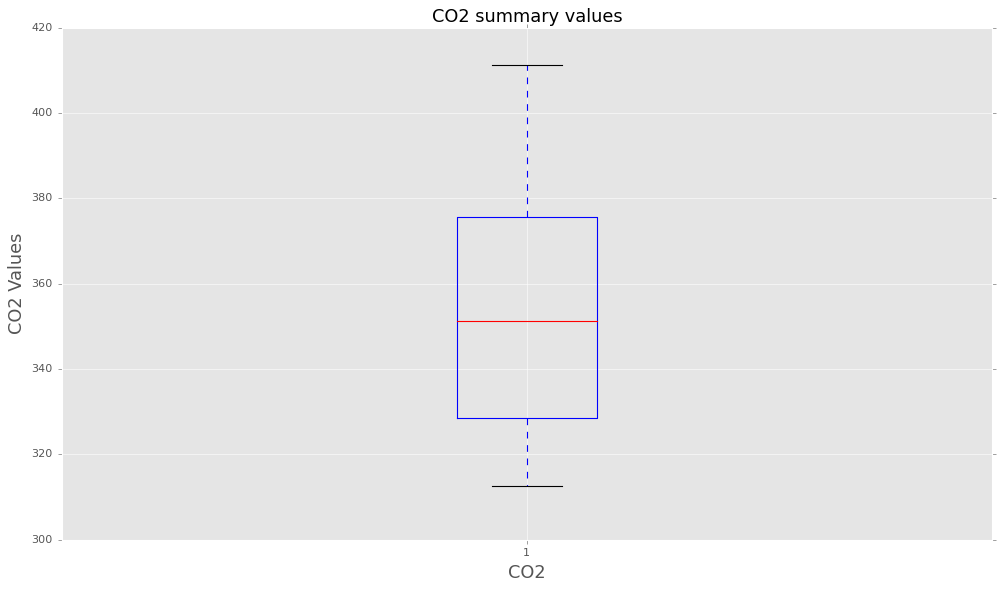

In [291]:
# Checking if there are any outliers
plt.figure(figsize=(15,8))
plt.boxplot(data=df, x='CO2_ppm')
plt.xlabel('CO2', fontsize=16)
plt.ylabel('CO2 Values', fontsize=16)
plt.title('CO2 summary values', fontsize=16)
plt.show()

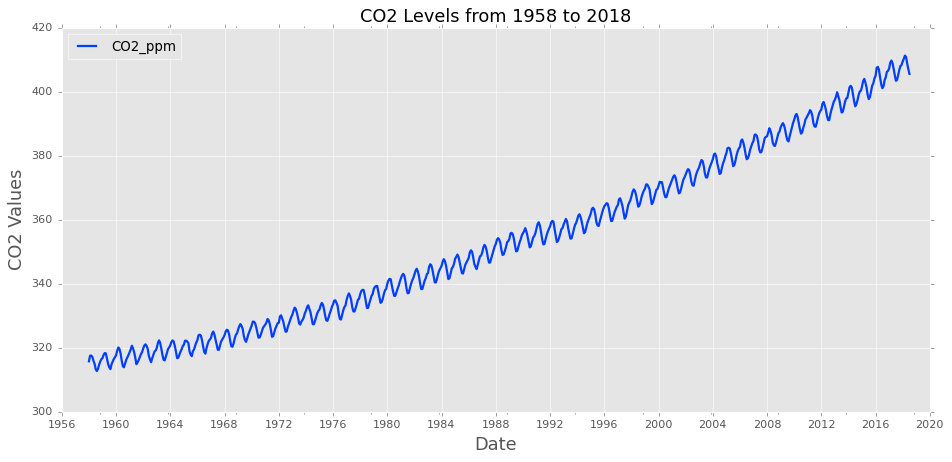

In [302]:
# Plotting CO2 levels across the years
fig, ax = plt.subplots()
df.plot(ax=ax, figsize=(14,6), linewidth=2)
ax.set_xticks([pd.to_datetime(str(year)+'-03-01') for year in list(range(1956,2021,4))])
ax.set_xticklabels([str(year) for year in list(range(1956,2021,4))], rotation=0)
ax.set_xlabel('Date', fontsize=16)
ax.set_ylabel('CO2 Values', fontsize=16)
ax.set_title('CO2 Levels from 1958 to 2018', fontsize=16)
plt.show()

> Clearly, the CO2 levels increase regularly across the years.

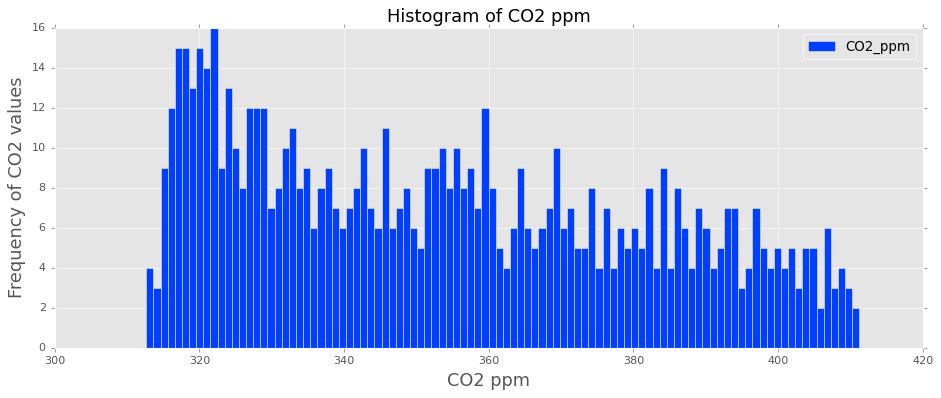

In [263]:
ax2 = df.plot(kind='hist', figsize=(14,5), bins=100)
ax2.set_xlabel('CO2 ppm', fontsize=16)
ax2.set_ylabel('Frequency of CO2 values', fontsize=16)
ax2.set_title('Histogram of CO2 ppm', fontsize=16)
plt.show()

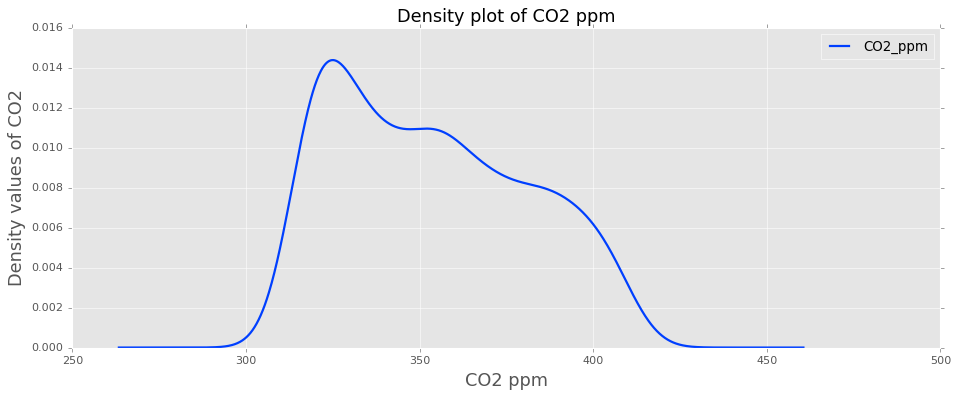

In [264]:
ax3 = df.plot(kind='density', figsize=(14,5), linewidth=2)
ax3.set_xlabel('CO2 ppm', fontsize=16)
ax3.set_ylabel('Density values of CO2', fontsize=16)
ax3.set_title('Density plot of CO2 ppm', fontsize=16)
plt.show()

> We conclude from the two graphs above that the pace of increase of CO2 levels is gradually increasing across the years.

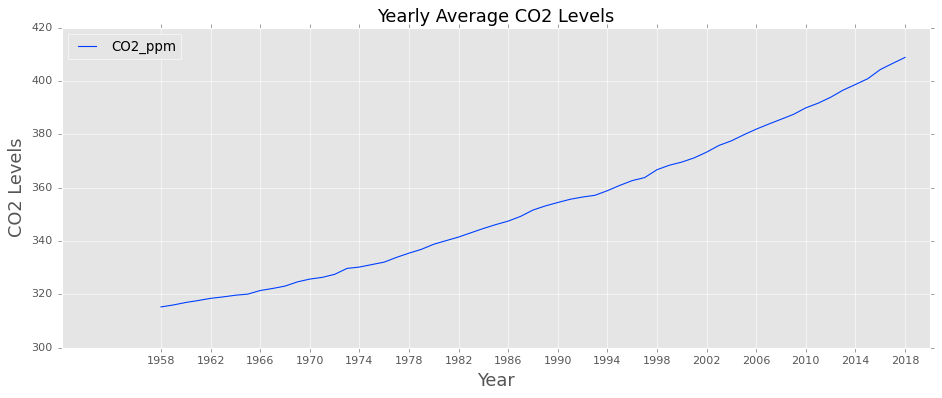

In [265]:
# Plotting a the average of CO2 levels each year 
index_year = df.index.year
co2_levels_by_year = df.groupby(index_year).mean()
ax = co2_levels_by_year.plot(figsize=(14,5))
ax.set_xticks([year for year in list(range(1958,2021,4))])
ax.set_xticklabels([str(year) for year in list(range(1958,2021,4))])
ax.set_xlabel("Year", fontsize=16)
ax.set_ylabel("CO2 Levels", fontsize=16)
ax.set_title("Yearly Average CO2 Levels", fontsize=16)
plt.show()

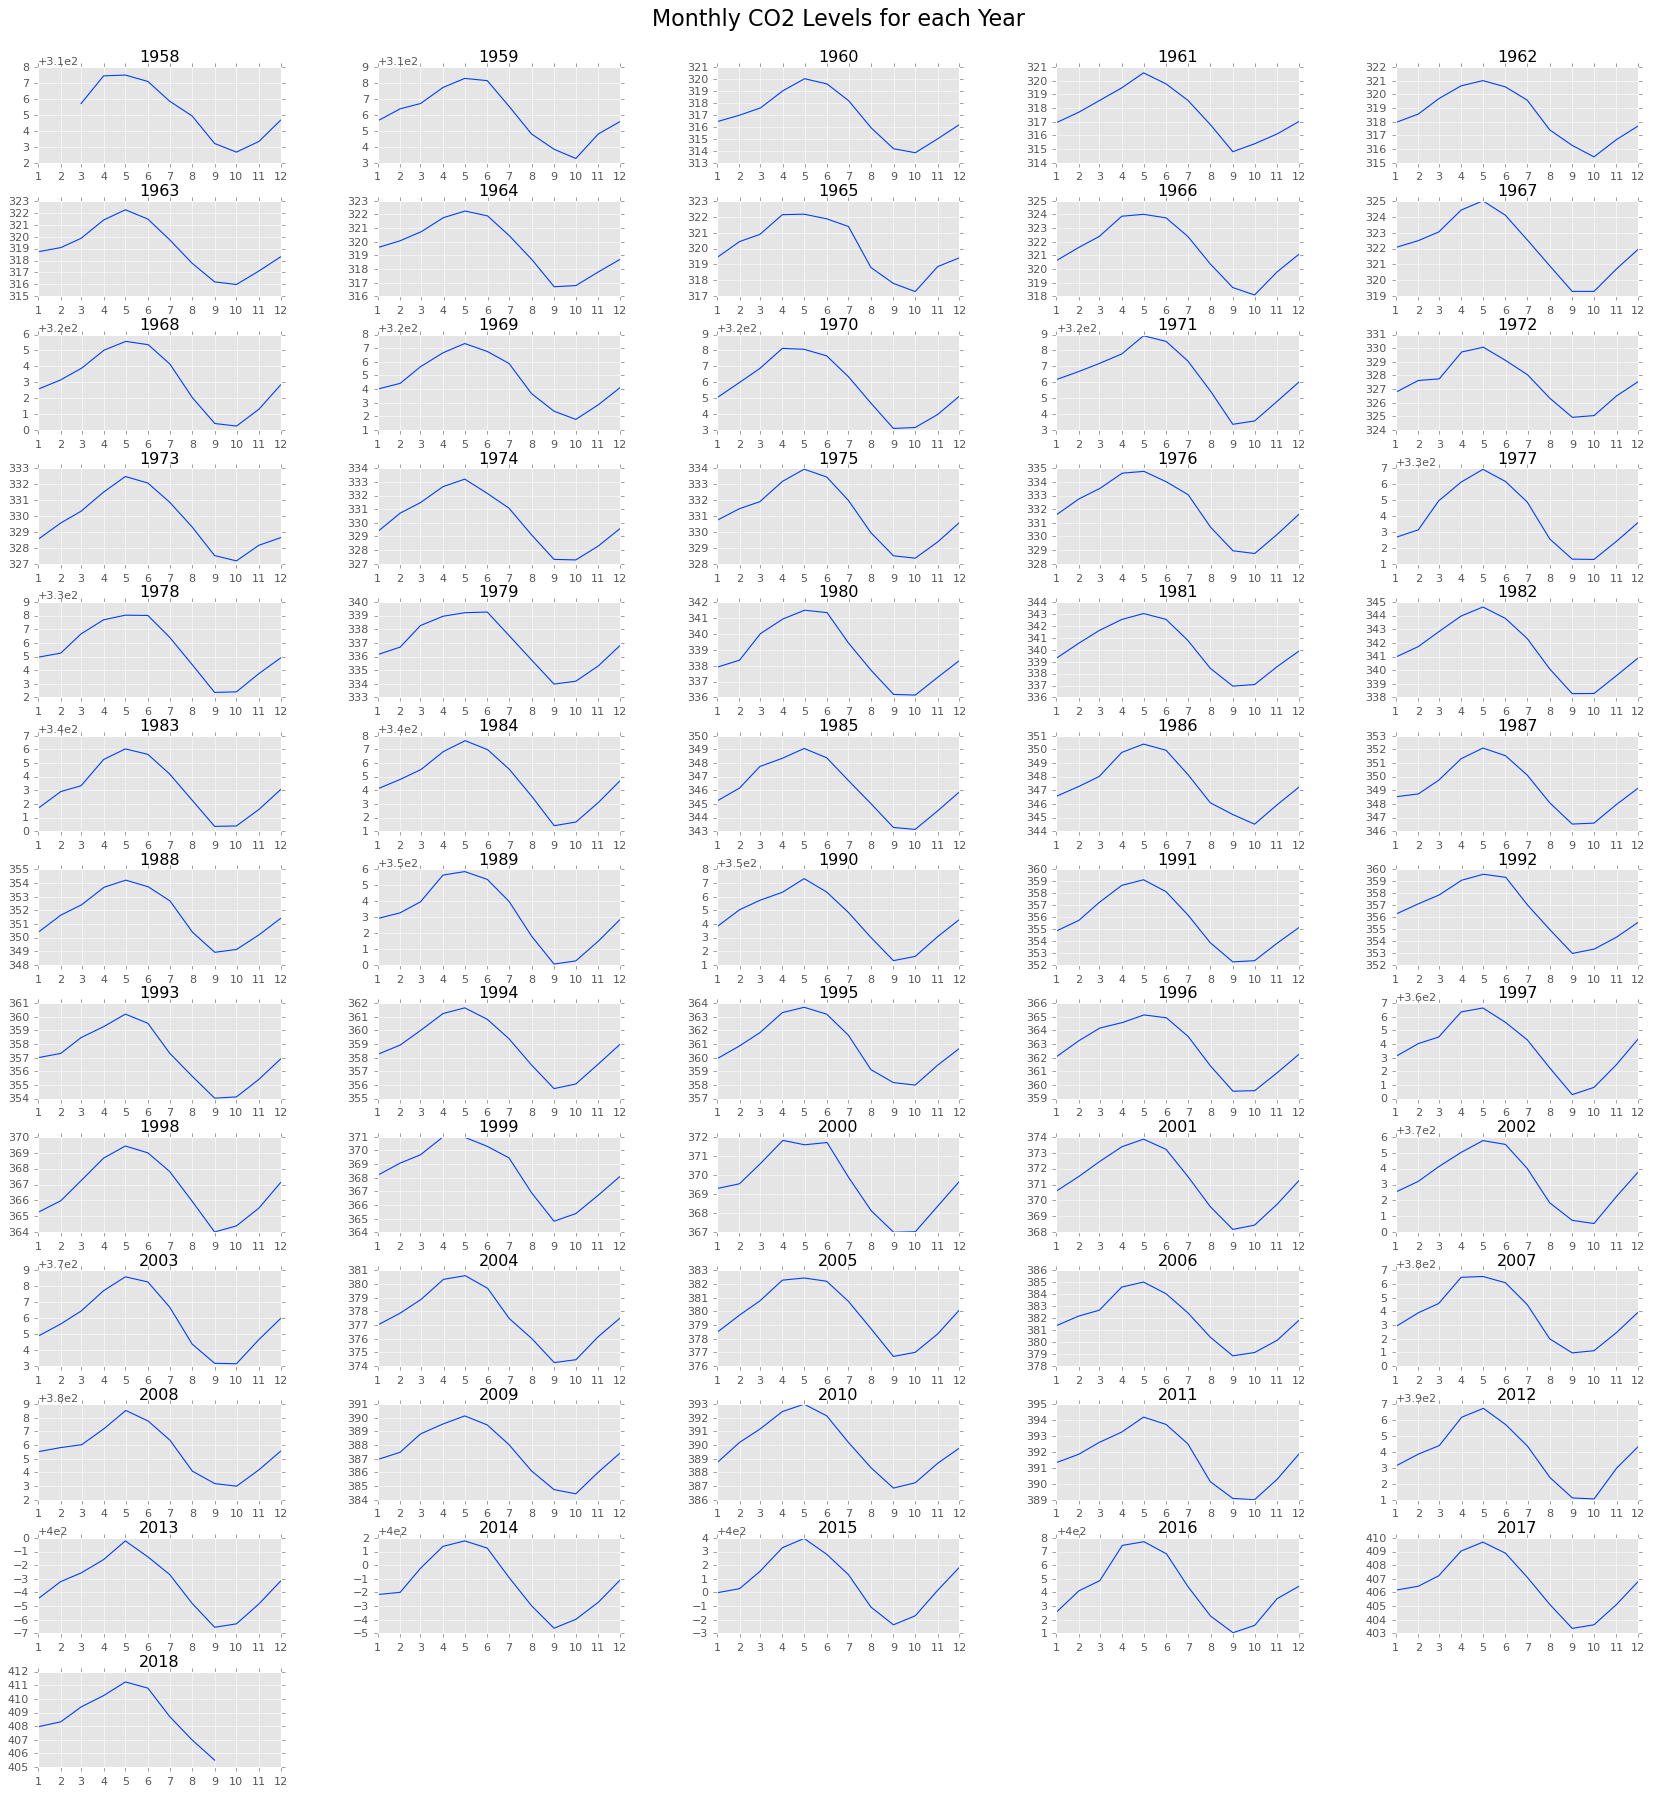

In [266]:
years = df.index.year.unique()
plt.figure(figsize=(25,25))
for i ,year in enumerate(years):
    labels = [str(month) for month in range(1,13)]
    ticks = [pd.to_datetime(str(year)+f'-{month}-01') for month in list(range(1,13))]
    df_tmp = df.loc[str(year)]

    plt.subplots_adjust(left=0.1, bottom=0.05, top=0.9, wspace=0.4,hspace=0.4)
    plt.subplot(len(years)//5+1, 5, i+1)
    plt.plot(df_tmp)
    plt.xticks(ticks, labels, rotation=0)
    plt.suptitle('Monthly CO2 Levels for each Year', fontsize=20, y=0.93)
    plt.title(f'{year}')

plt.show()

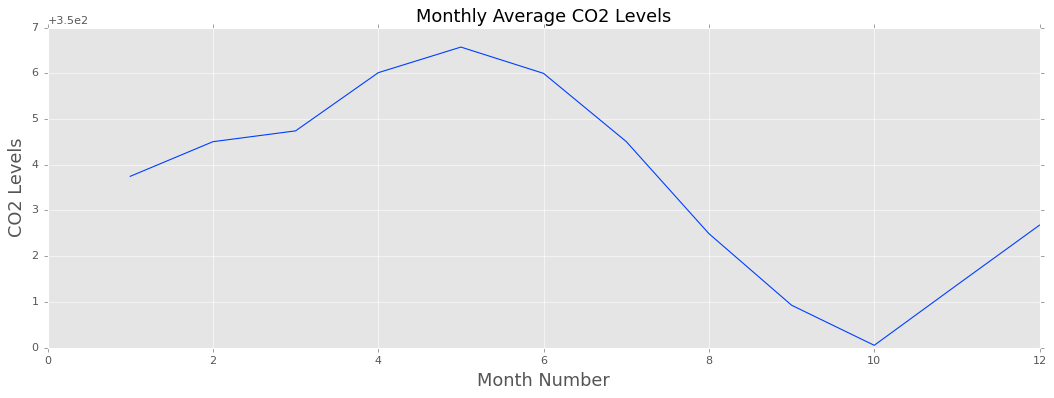

In [301]:
# Plotting a the average of CO2 levels each month for through all the years 
index_month = df.index.month
co2_levels_by_month = df.groupby(index_month).mean()
plt.figure(figsize=(16, 5))
plt.plot(co2_levels_by_month)
plt.xlabel("Month Number", fontsize=16)
plt.ylabel("CO2 Levels", fontsize=16)
plt.title("Monthly Average CO2 Levels", fontsize=16)
plt.show()

> Clearly, the CO2 levels reaches its maximum levels during spring and its lowest levels during autumn.

# 4) Autocorrelation

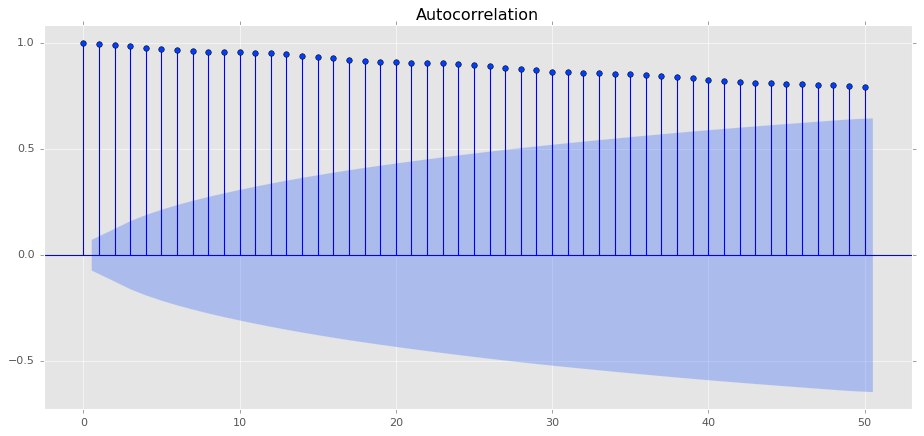

In [268]:
fig = tsaplots.plot_acf(df['CO2_ppm'], lags=50)
fig.set_size_inches(14,6)

# 5) Partial Autocorrelation

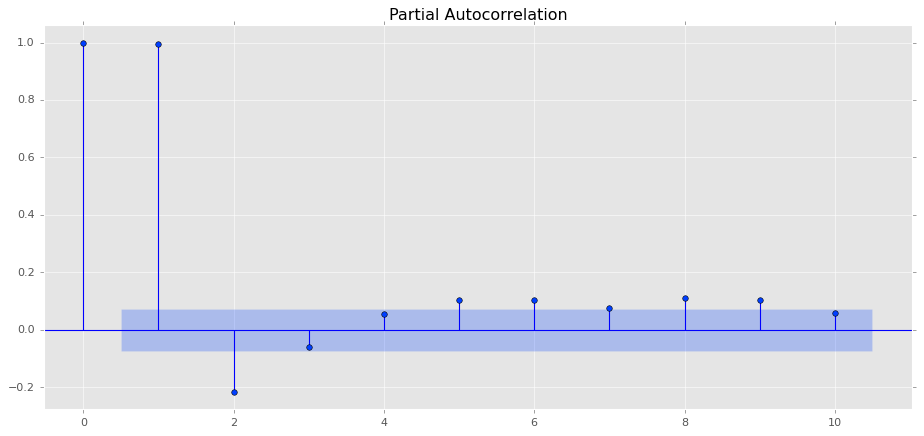

In [269]:
fig = tsaplots.plot_pacf(df['CO2_ppm'], lags=10)
fig.set_size_inches(14,6)

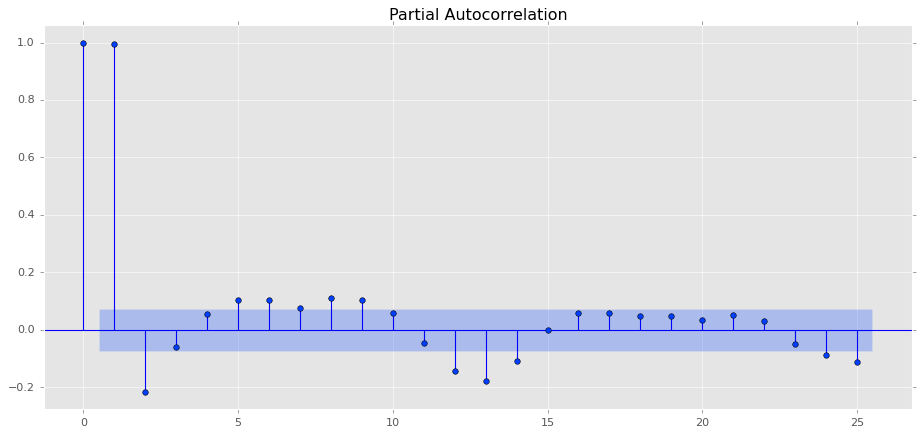

In [270]:
fig = tsaplots.plot_pacf(df['CO2_ppm'], lags=25)
fig.set_size_inches(14,6)

# 6) Seasonality, Trend and Noise

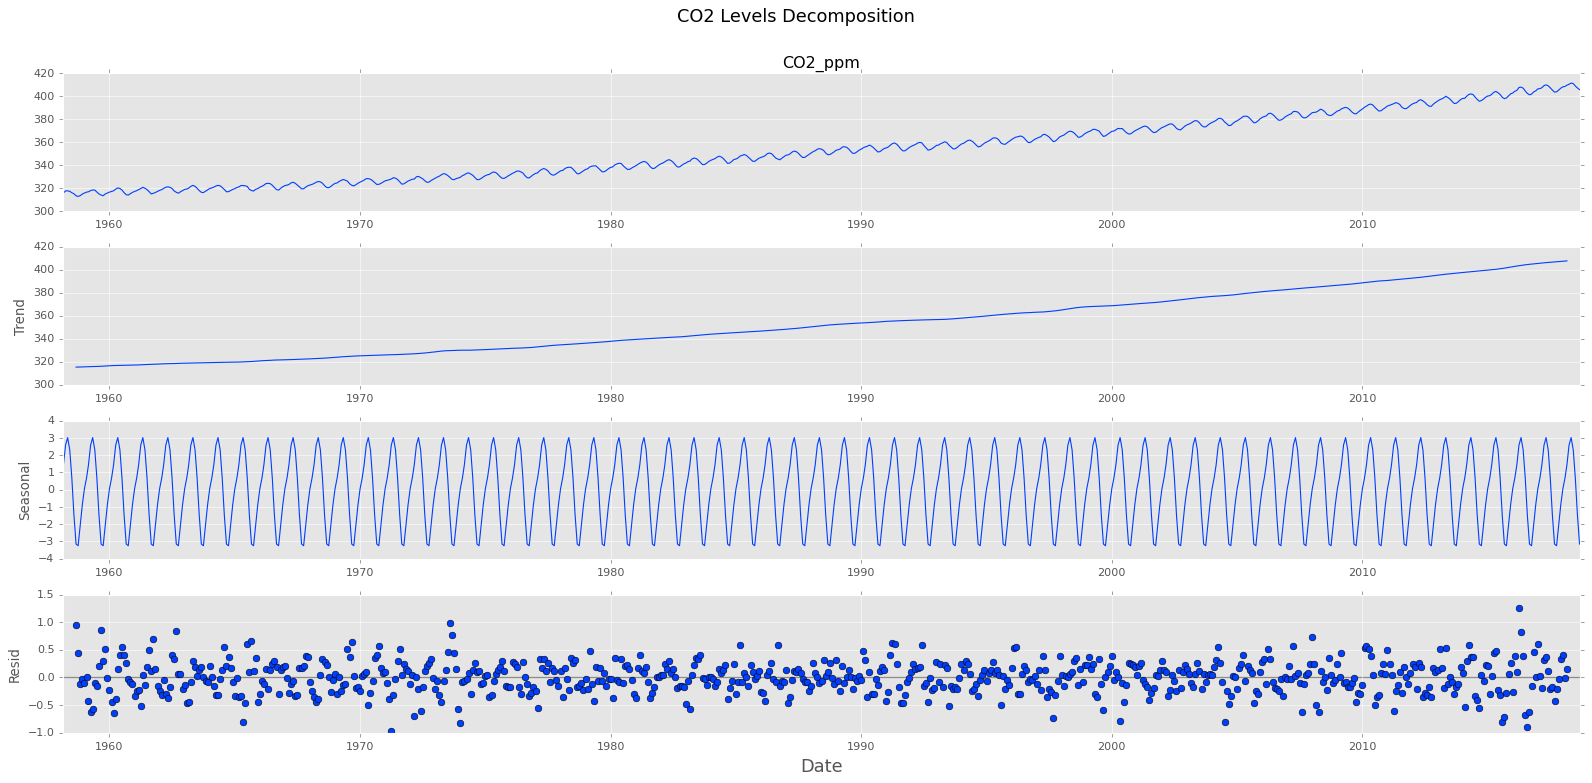

In [300]:
rcParams['figure.figsize'] = 20, 9
decomposition = sm.tsa.seasonal_decompose(df['CO2_ppm'])
fig = decomposition.plot()
plt.xlabel('Date', fontsize=16)
plt.suptitle('CO2 Levels Decomposition', fontsize=16, y=1.05)
plt.show()

# 7) Checking the data staionarity

### Making the time-series stationary
- Before modelling we must make the time-series stationary
- Use the Augmented Dicky-Fuller test for trend non_stationarity
- Null Hypothesis: time series is non-stationary 

In [272]:
# The Augmented Dicky-Fuller test for non-stationarity
adfuller_result = adfuller(df.CO2_ppm)
adfuller_result

(4.774866785205455,
 1.0,
 20,
 706,
 {'1%': -3.439646367660705,
  '5%': -2.8656425177031375,
  '10%': -2.5689546724554404},
 494.90714335429084)

- 0th element is test statistics: more positive means more likely to be non-stationary
- 1st element is p-value: if p-value is more than threshold(0.05) -> Fail to reject null hypothesis()
- 4th is the critical test statistics

#### To make the time series stationary you could:
- Take the difference
- Or take the log
- Or take the square root
- Or take the proportional change (df.shift(1)/df)


In [273]:
# Taking the difference between each record and the record prior to it in time
diff_df = df.diff().dropna()

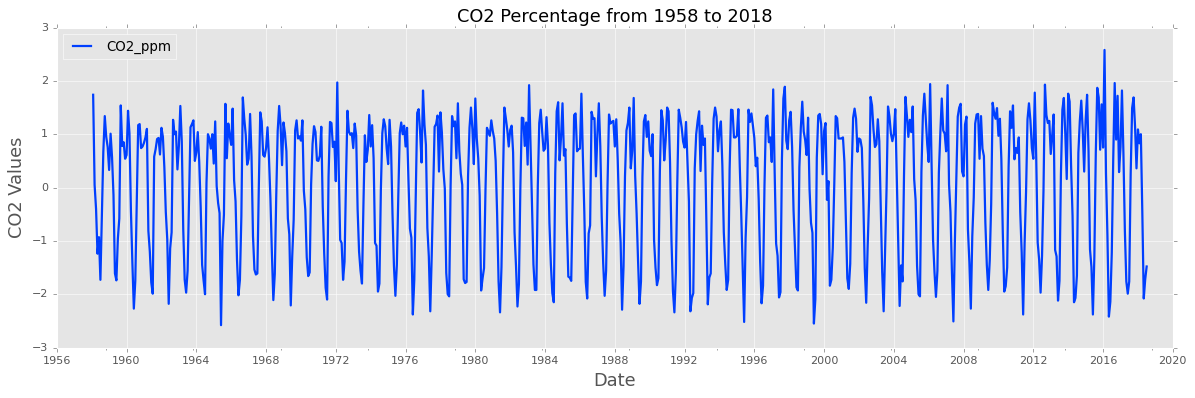

In [274]:
# Plotting the time-series after taking the difference
fig, ax = plt.subplots()
diff_df.plot(ax=ax, figsize=(18,5), linewidth=2)
ax.set_xticks([pd.to_datetime(str(year)+'-03-01') for year in list(range(1956,2021,4))])
ax.set_xticklabels([str(year) for year in list(range(1956,2021,4))], rotation=0)
ax.set_xlabel('Date', fontsize=16)
ax.set_ylabel('CO2 Values', fontsize=16)
ax.set_title('CO2 Percentage from 1958 to 2018', fontsize=16)
plt.show()

In [275]:
# Taking the Augmented Dicky-Fuller test again, but for the diff_df
adfuller_result_2 = adfuller(diff_df.CO2_ppm)
adfuller_result_2

(-5.287425631615313,
 5.813789175331137e-06,
 20,
 705,
 {'1%': -3.4396596024765795,
  '5%': -2.86564834926679,
  '10%': -2.568957779286756},
 504.3526488821651)

# 8) Fitting an ARIMA Model

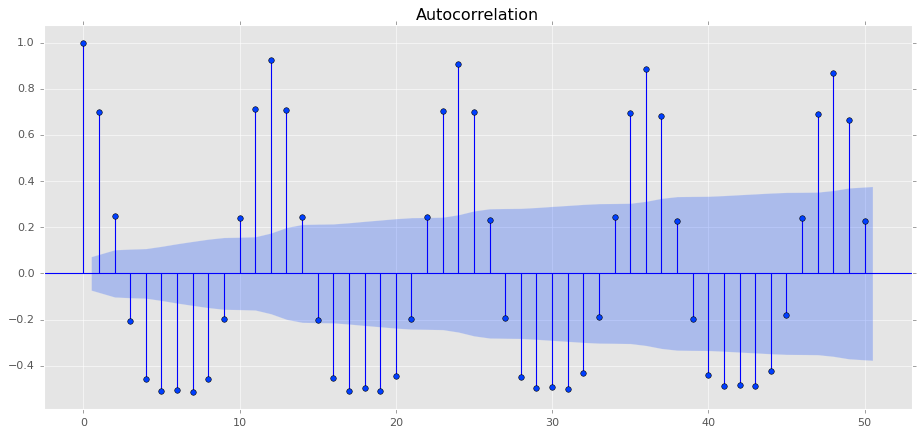

In [276]:
fig = tsaplots.plot_acf(diff_df['CO2_ppm'], lags=50)
fig.set_size_inches(14,6)

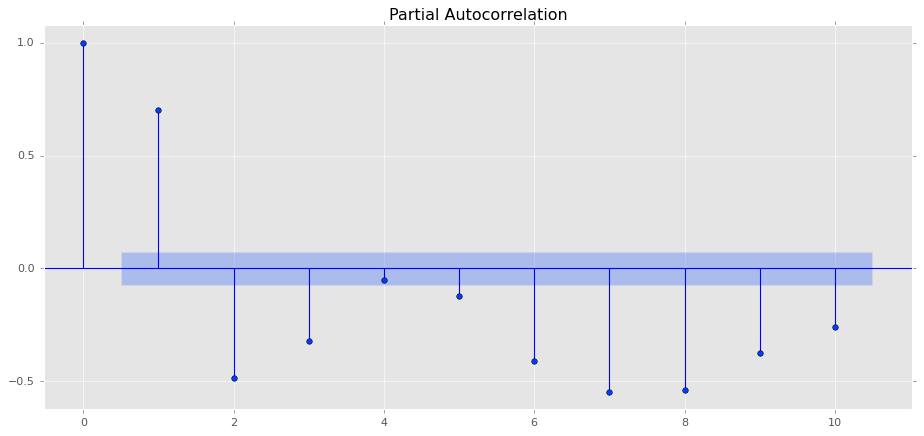

In [277]:
fig = tsaplots.plot_pacf(diff_df['CO2_ppm'], lags=10)
fig.set_size_inches(14,6)

### Searching over the lowest AIC and BIC

In [278]:
order_aic_bic = []
# Loop over AR order
for p in range(10):
    # Loop over MA order
    for q in range(10):
        # Fit model
        try:
            model = ARIMA(diff_df, order=(p,0,q), freq=diff_df.index.inferred_freq)
            results = model.fit()
            
            # Add order and scores to list
            order_aic_bic.append((p, q, results.aic, results.bic))
        except:
            order_aic_bic.append((p, q, None, None))

c:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
c:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
c:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
c:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
c:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency informa

In [279]:
# Make DataFrame of model order and AIC/BIC scores
order_df = pd.DataFrame(order_aic_bic, columns=['p', 'q', 'aic', 'bic'])

In [280]:
# Sort by AIC
order_df.sort_values('aic').head(10)

,p,q,aic,bic
89,8,9,485.454129,572.617580
97,9,7,491.164134,573.740034
78,7,8,492.435461,570.423811
87,8,7,495.456413,573.444763
67,6,7,510.687007,579.500257
58,5,8,513.770735,582.583985
79,7,9,513.948269,596.524170
69,6,9,515.448604,593.436954
99,9,9,523.996663,615.747663
88,8,8,524.151030,606.726930


In [281]:
# Sort by BIC
order_df.sort_values('bic').head(10)

,p,q,aic,bic
78,7,8,492.435461,570.423811
89,8,9,485.454129,572.617580
87,8,7,495.456413,573.444763
97,9,7,491.164134,573.740034
67,6,7,510.687007,579.500257
58,5,8,513.770735,582.583985
57,5,7,527.572236,591.797936
69,6,9,515.448604,593.436954
79,7,9,513.948269,596.524170
48,4,8,535.018671,599.244371


> Since we want the model predictability to be accurate as possible no matter its complexity, we will choose the model order that achieves the lowest AIC.

### Creating the final model
- We will be using the SARIMAX class.
- The difference parameter will be set to 1.
- The trend parameter will be set to 't' (linear trend in time), since the data is not centered around zero.

In [282]:
df_train = df[:'2014']
df_train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 682 entries, 1958-03-01 to 2014-12-01
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CO2_ppm  682 non-null    float64
dtypes: float64(1)
memory usage: 10.7 KB


In [283]:
df_test = df['2015':]
df_test.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 45 entries, 2015-01-01 to 2018-09-01
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CO2_ppm  45 non-null     float64
dtypes: float64(1)
memory usage: 720.0 bytes


In [284]:
final_model = SARIMAX(df_train, order=(8,1,9), trend='t', freq=df_train.index.inferred_freq)
final_results = final_model.fit()
print(final_results.summary())

c:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


c:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                CO2_ppm   No. Observations:                  682
Model:               SARIMAX(8, 1, 9)   Log Likelihood                -212.030
Date:                Thu, 23 Nov 2023   AIC                            462.059
Time:                        19:52:25   BIC                            548.007
Sample:                    03-01-1958   HQIC                           495.325
                         - 12-01-2014                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
drift          0.0006      0.000      1.320      0.187      -0.000       0.002
ar.L1          0.7991      1.126      0.710      0.478      -1.408       3.006
ar.L2         -0.8085      1.687     -0.479      0.6

In [285]:
# Forecast
forecast = final_results.get_prediction(start=-50)
predicted_mean = forecast.predicted_mean

# Confidence interval values
confidence_intervals = forecast.conf_int()

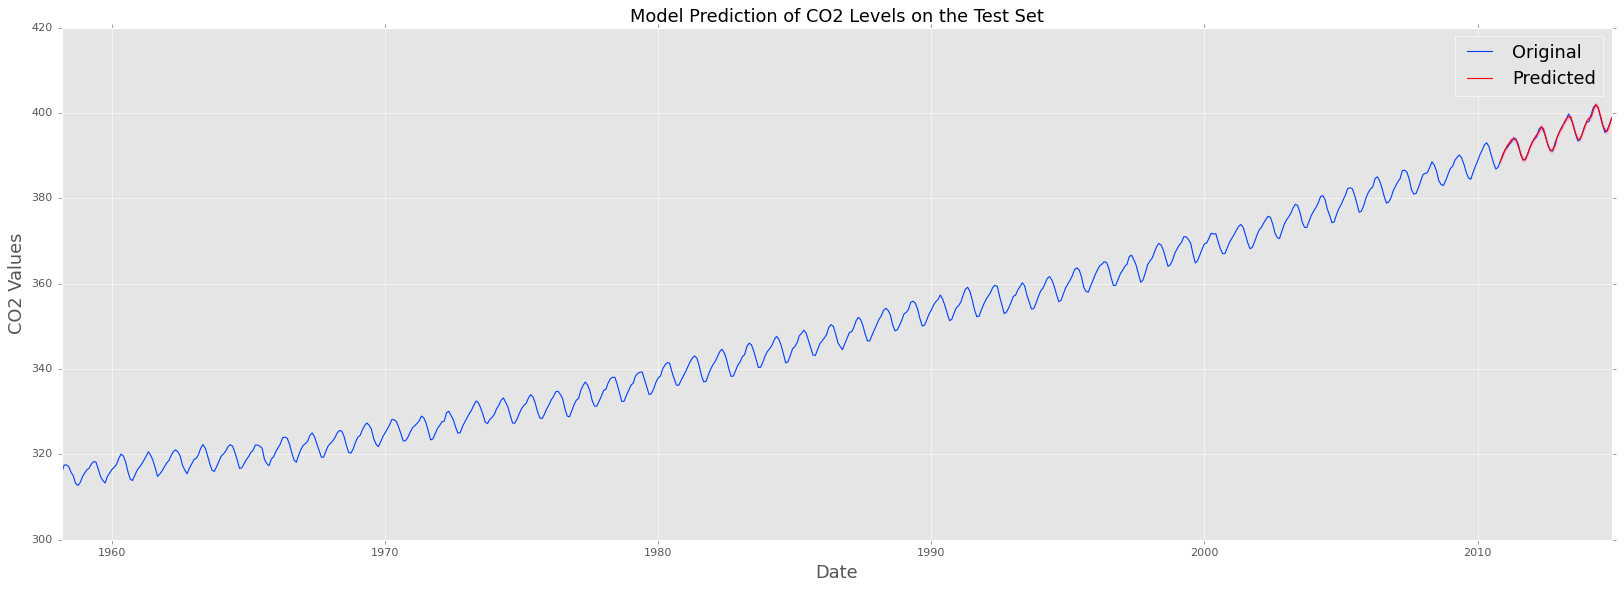

In [298]:
plt.figure(figsize=(25,8))
# Plot prediction
plt.plot(df_train)
plt.plot(predicted_mean.index, predicted_mean.values, color='red', label='forecast')
plt.legend(['Original', 'Predicted'], fontsize=16)
plt.xlabel('Date', fontsize=16)
plt.ylabel('CO2 Values', fontsize=16)
plt.title('Model Prediction of CO2 Levels on the Test Set', fontsize=16)
# Shade uncertainty area
plt.fill_between(predicted_mean.index, confidence_intervals['lower CO2_ppm'], confidence_intervals['upper CO2_ppm'], color='pink')
plt.show()

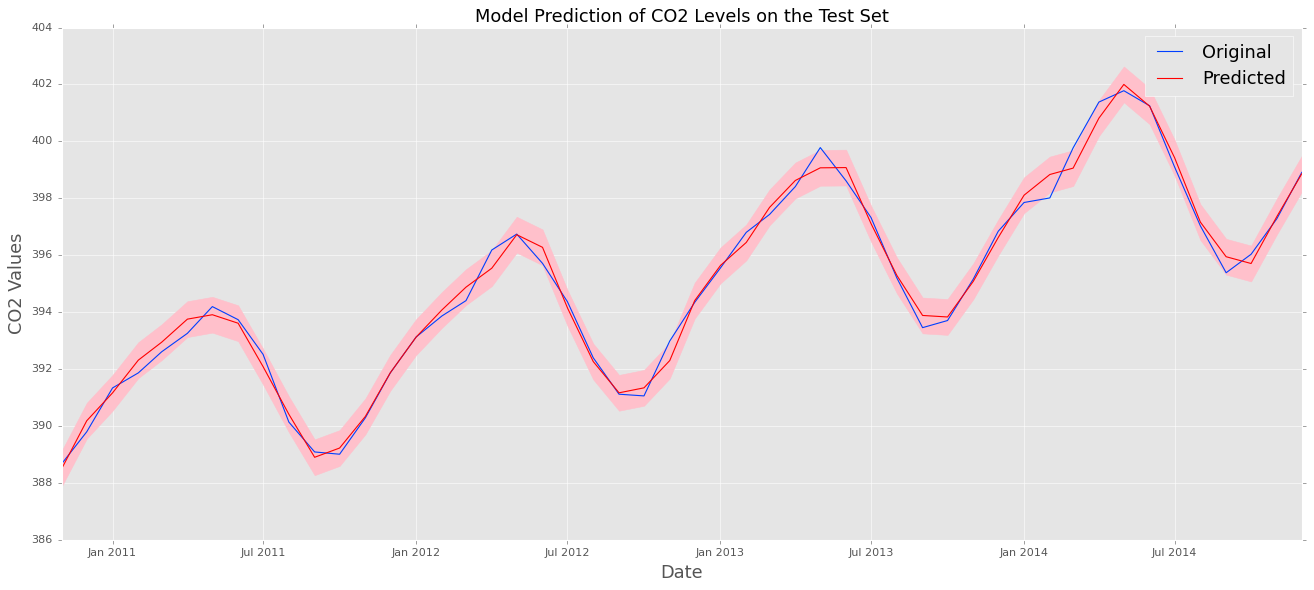

In [287]:
plt.figure(figsize=(20,8))
# Plot prediction
plt.plot(df_train[-50:])
plt.plot(predicted_mean.index, predicted_mean.values, color='red', label='forecast')
plt.legend(['Original', 'Predicted'], fontsize=16)
plt.xlabel('Date', fontsize=16)
plt.ylabel('CO2 Values', fontsize=16)
plt.title('Model Prediction of CO2 Levels on the Test Set', fontsize=16)
# Shade uncertainty area
plt.fill_between(predicted_mean.index, confidence_intervals['lower CO2_ppm'], confidence_intervals['upper CO2_ppm'], color='pink')
plt.show()

> The model is doing great.

### Future Predictions (Out of Sample Predictions)

In [288]:
steps = 200
future_dates = pd.date_range(df_train.index[-1], periods=steps, freq=pd.offsets.MonthBegin())

f_predictions = final_results.get_forecast(steps=steps)

f_conf = f_predictions.conf_int()

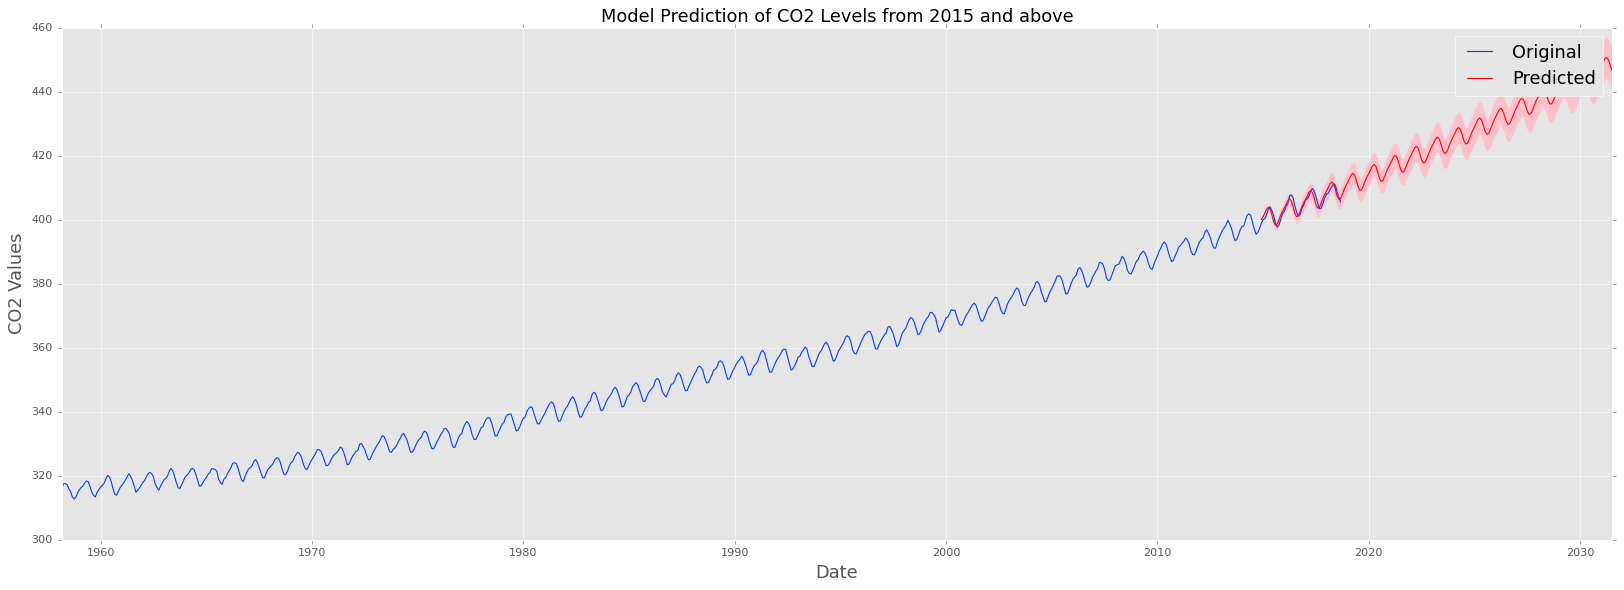

In [297]:
plt.figure(figsize=(25,8))
# Plot prediction
plt.plot(df)
plt.plot(future_dates, f_predictions.predicted_mean.values, color='red', label='forecast')
plt.legend(['Original', 'Predicted'], fontsize=16)
plt.xlabel('Date', fontsize=16)
plt.ylabel('CO2 Values', fontsize=16)
plt.title('Model Prediction of CO2 Levels from 2015 and above', fontsize=16)
# Shade uncertainty area
plt.fill_between(future_dates, f_conf['lower CO2_ppm'], f_conf['upper CO2_ppm'], color='pink')
plt.show()

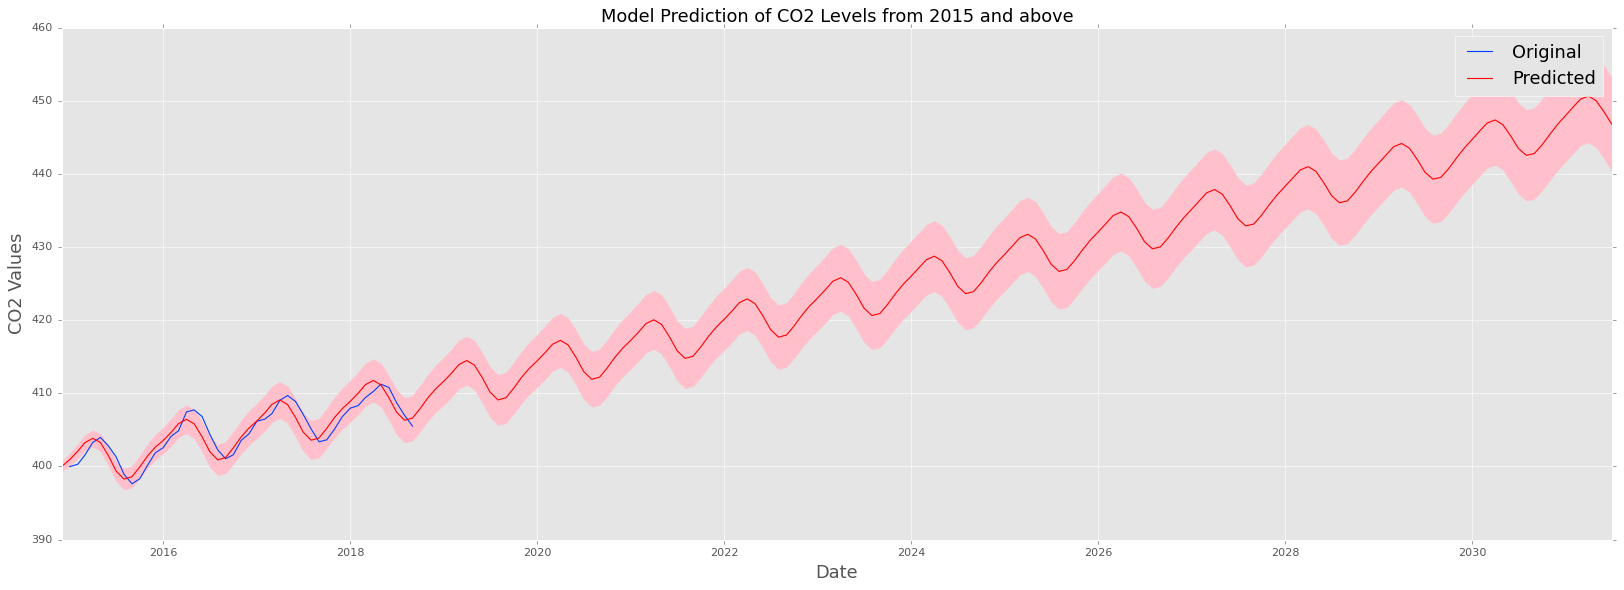

In [295]:
plt.figure(figsize=(25,8))
# Plot prediction
plt.plot(df_test)
plt.plot(future_dates, f_predictions.predicted_mean.values, color='red', label='forecast')
plt.legend(['Original', 'Predicted'], fontsize=16)
plt.xlabel('Date', fontsize=16)
plt.ylabel('CO2 Values', fontsize=16)
plt.title('Model Prediction of CO2 Levels from 2015 and above', fontsize=16)
# Shade uncertainty area
plt.fill_between(future_dates, f_conf['lower CO2_ppm'], f_conf['upper CO2_ppm'], color='pink')
plt.show()

> The model seems to be doing great on future predictions. </br>
> Notice how the model certainty decreases over time (confidence intervals gets larger).